# Bank Customer Churn Prediction



In [1]:
# Task 3

# Develop a model to predict customer churn for a subscription-based service or business. 
# Use historical customer data, including features like usage behavior and customer demographics, 
# and try algorithms like Logistic Regression, Random Forests, or GradientBoosting to predict churn.

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.ensemble import GradientBoostingRegressor   
from matplotlib import pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.express as px
import seaborn as sns

In [3]:
# Load datasets
train_data = pd.read_csv(
    r"C:\Users\Michel Diego\Downloads\archive (10)\Churn_Modelling.csv"
)

In [4]:
train_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Checking for nan values

train_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Dataset shape

train_data.shape

(10000, 14)

In [7]:
# Dataset types info

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Encoding object predictors

label_encoder = LabelEncoder()

train_data['Geography_Encoded'] = label_encoder.fit_transform(train_data['Geography'])
train_data['Gender_Encoded'] = label_encoder.fit_transform(train_data['Gender'])

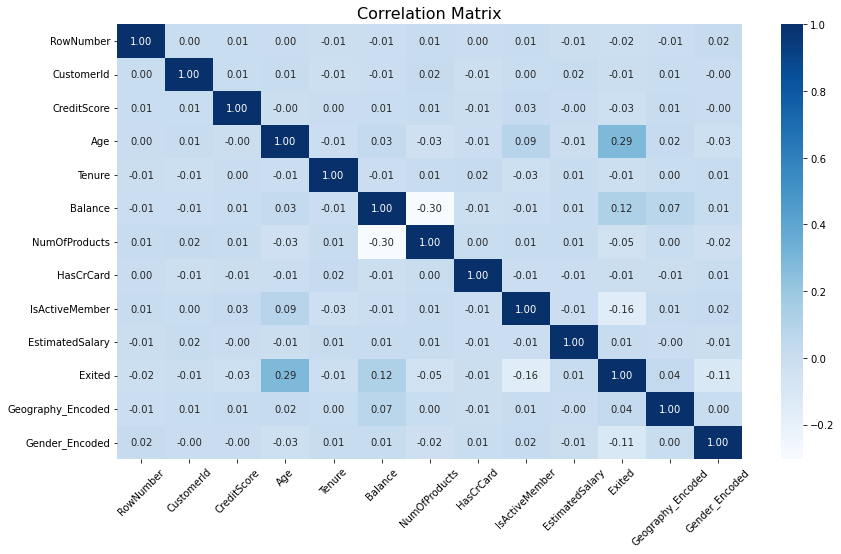

In [9]:
# Correlation map

train_data2 = train_data.select_dtypes(exclude=['object'])

cormap = train_data2.corr()

plt.figure(figsize = (14,8))

sns.heatmap(cormap, cmap= 'Blues', annot=True, fmt=".2f", cbar=True, xticklabels=True, yticklabels=True)

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)


plt.show()

#low correlation among Exited and other columns but we can see a columns that would be relevant in the analysis, such as Balance, NumOfProducts, Tenure, IsActiveMember and EstimatedSalary. Lets go further.


# Perfoming EDA

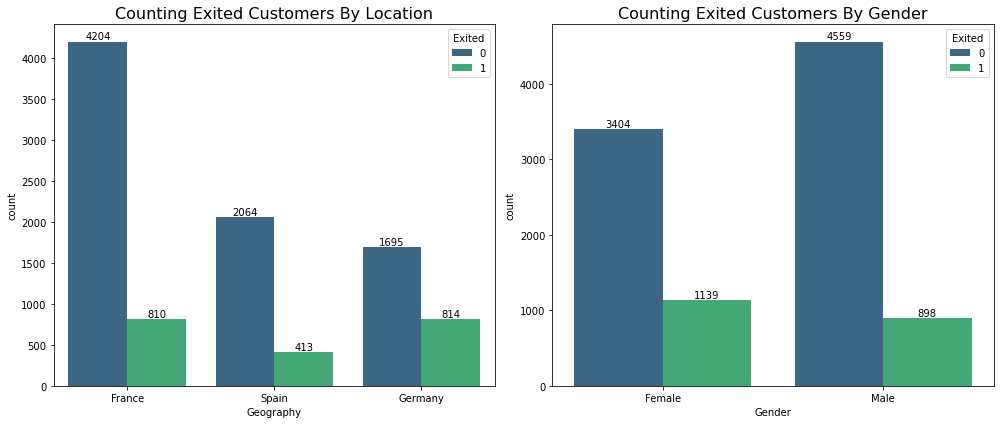

In [10]:
# Exited Customers by Location and Gender

df_region = train_data[['Geography', 'Exited']]
df_gender = train_data[['Gender', 'Exited']]

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)

ax = sns.countplot(data=df_region, x = 'Geography', hue='Exited', palette= 'viridis')

ax.bar_label(ax.containers[0], label_type='edge')  
ax.bar_label(ax.containers[1], label_type='edge') 

plt.title('Counting Exited Customers By Location', fontsize=16)

plt.subplot(1, 2, 2)

ax_2 = sns.countplot(data=df_gender, x = 'Gender', hue='Exited', palette= 'viridis')

ax_2.bar_label(ax_2.containers[0], label_type='edge')  
ax_2.bar_label(ax_2.containers[1], label_type='edge') 

plt.title('Counting Exited Customers By Gender', fontsize=16)

plt.tight_layout()

plt.show()

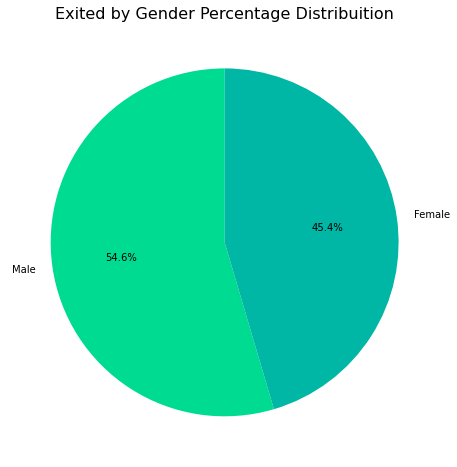

In [11]:
# Exited by Gender Percentage Distribuition

plt.figure(figsize = (12,8))

plt.pie(data=df_gender, x=df_gender.Gender.value_counts(), 
        labels = df_gender.Gender.value_counts().index, autopct='%1.1f%%', 
        startangle=90,
        colors=sns.color_palette('winter_r') )

plt.title("Exited by Gender Percentage Distribuition", fontsize=16)

plt.show()

In [12]:
# Age column distribuition

train_data.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

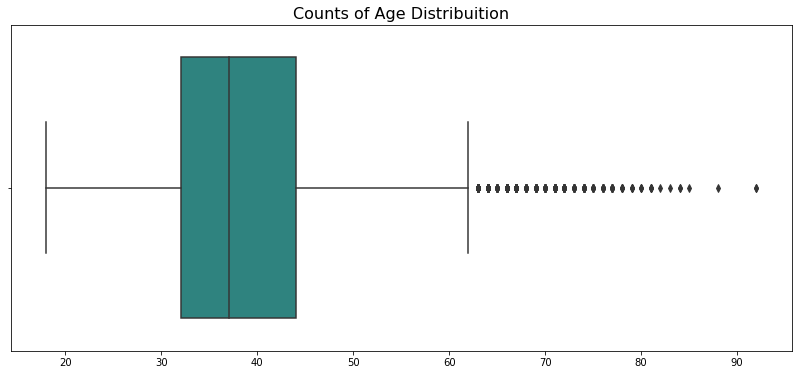

In [13]:
# Age column distribuition Boxplot

plt.figure(figsize=(14,6))

sns.boxplot(x=train_data.Age.values, palette='viridis')

plt.title('Counts of Age Distribuition', fontsize=16)

plt.show()

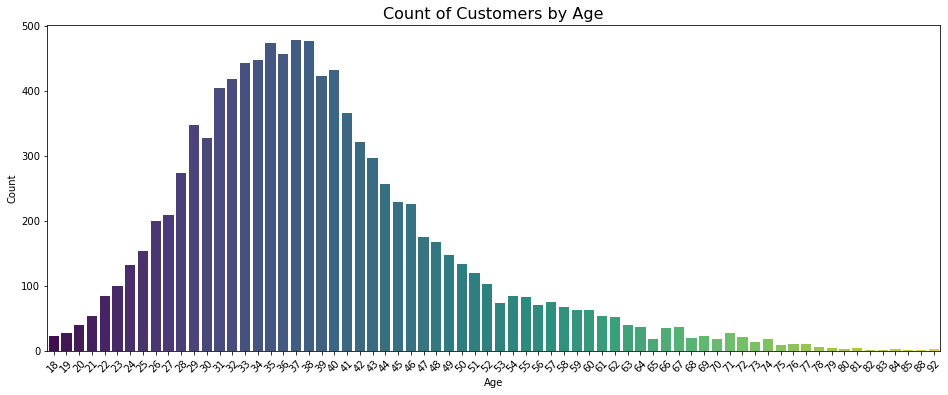

In [14]:
# Count occurrences of each age
age_counts = train_data['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Counts']

# Plot the counts
plt.figure(figsize=(16, 6))
sns.barplot(data=age_counts, x='Age', y='Counts', palette='viridis')

plt.title('Count of Customers by Age', fontsize=16)

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [15]:
# Apply the function to the 'Age' column to create Bins Groups

train_data['Age_Group'] = train_data['Age'].apply(
    lambda age: '18-34' if 18 <= age <= 34 else
                '35-49' if 35 <= age <= 49 else
                '50-64' if 50 <= age <= 64 else
                '65-80' if 65 <= age <= 80 else
                '81+'
)

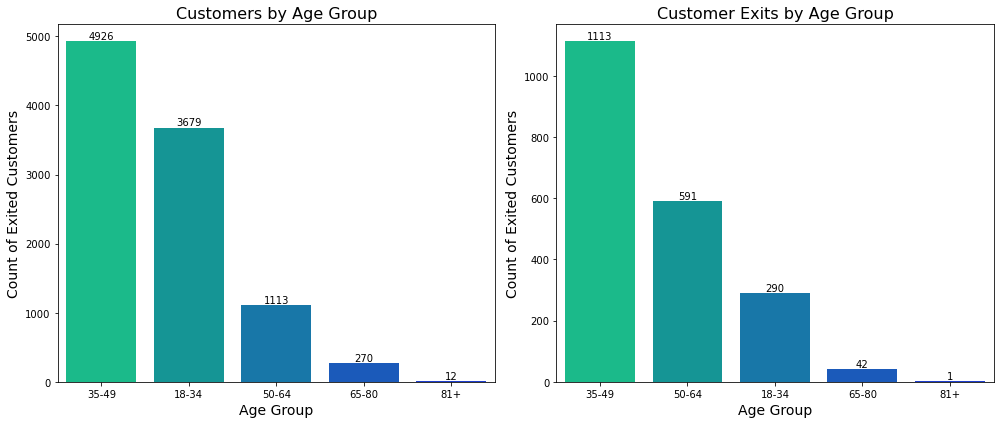

In [16]:
# Ploting customers by Age

age_group = train_data.Age_Group.value_counts()

exited = train_data[train_data['Exited'] == 1]
age_group_exited = exited.Age_Group.value_counts()


plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)


ax = sns.barplot(x = age_group.index, y=age_group.values,
                 palette= 'winter_r')

ax.bar_label(ax.containers[0], label_type='edge')  

plt.title('Counting Exited Customers By Age')

# Customers Exited by Age

plt.subplot(1, 2, 2)

# Set labels for the x-axis and y-axis

ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Count of Exited Customers', fontsize=14)
ax.set_title('Customers by Age Group', fontsize=16)

ax_2 = sns.barplot(x = age_group_exited.index, y=age_group_exited.values,
                 palette= 'winter_r')

ax_2.bar_label(ax_2.containers[0], label_type='edge')  

# Set labels for the x-axis and y-axis

ax_2.set_xlabel('Age Group', fontsize=14)
ax_2.set_ylabel('Count of Exited Customers', fontsize=14)
ax_2.set_title('Customer Exits by Age Group', fontsize=16)

plt.tight_layout()

plt.show()

In [17]:
train_data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

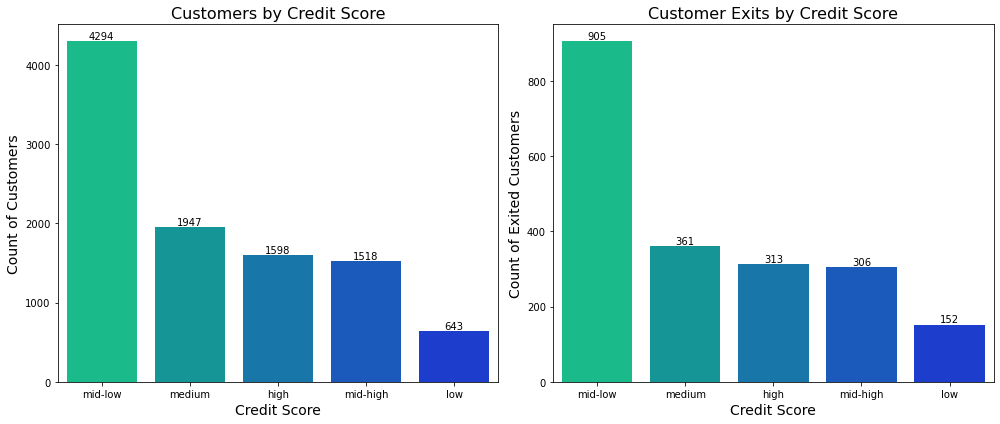

In [18]:
#  Creating labels by CreditScore

train_data['CreditScore_Groups'] = train_data['CreditScore'].apply(
        lambda creditscore: 
        'low' if 350 <= creditscore <=500 else
        'mid-low' if 501 <= creditscore <=650 else
        'medium' if 651 <= creditscore <=700 else
        'mid-high' if 701 <= creditscore <=750 else
        'high' 
)

df_cred = train_data['CreditScore_Groups'].value_counts()
df_cred_exited = train_data[train_data['Exited'] ==1]['CreditScore_Groups'].value_counts()

plt.figure(figsize = (14,6))
plt.subplot(1, 2, 1)

ax = sns.barplot(x = df_cred.index, y=df_cred.values, palette= 'winter_r')

ax.bar_label(ax.containers[0], label_type='edge')

# Set labels for the x-axis and y-axis

ax.set_xlabel('Credit Score', fontsize=14)
ax.set_ylabel('Count of Customers', fontsize=14)
ax.set_title('Customers by Credit Score', fontsize=16)

# Credit Score Exited Customers

plt.subplot(1, 2, 2)

ax_2 = sns.barplot(x = df_cred_exited.index, y=df_cred_exited.values, palette= 'winter_r')

ax_2.bar_label(ax_2.containers[0], label_type='edge')

# Set labels for the x-axis and y-axis

ax_2.set_xlabel('Credit Score', fontsize=14)
ax_2.set_ylabel('Count of Exited Customers', fontsize=14)
ax_2.set_title('Customer Exits by Credit Score', fontsize=16)

plt.tight_layout()

plt.show()

In [19]:
# Exited by Active Members

train_data['IsActiveMember'].describe()

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

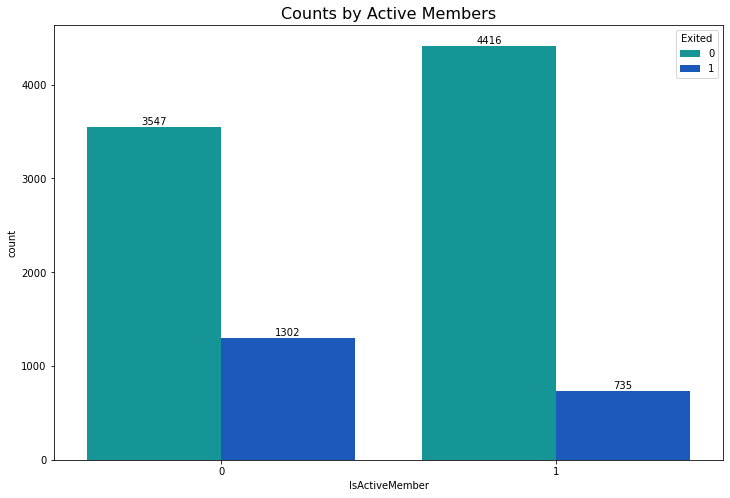

In [20]:
# Exited By Active Members

df_member = train_data[['IsActiveMember', 'Exited']]

plt.figure(figsize = (12,8))

ax = sns.countplot(data = df_member, x = 'IsActiveMember', hue='Exited', palette= 'winter_r')

ax.bar_label(ax.containers[0], label_type='edge')  
ax.bar_label(ax.containers[1], label_type='edge')

plt.title('Counts by Active Members', fontsize=16)


plt.show()

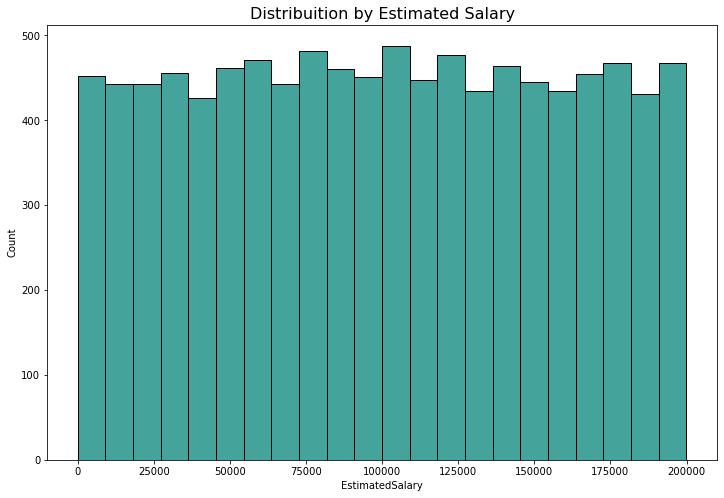

In [21]:
# By EstimatedSalary


plt.figure(figsize = (12,8))
sns.histplot(data = train_data, x='EstimatedSalary', color='#058478')

plt.title('Distribuition by Estimated Salary', fontsize=16)

plt.show()


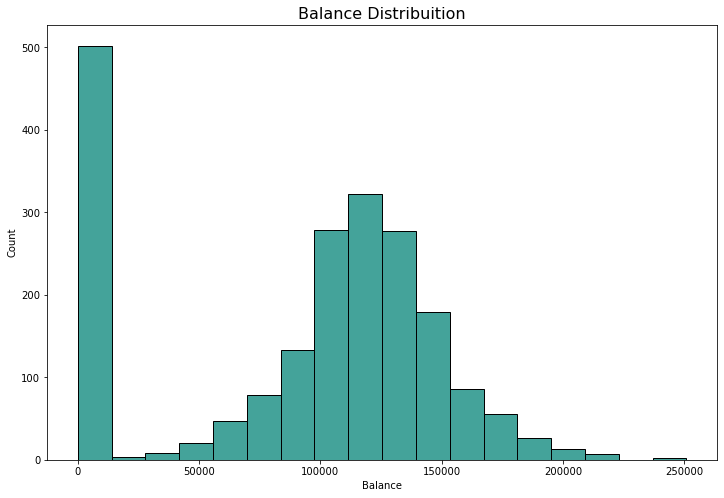

In [22]:
# Balance Distribuition

plt.figure(figsize = (12,8))
sns.histplot(data=train_data, x=train_data[train_data['Exited'] == 1]['Balance'], bins=18, color='#058478')

plt.title("Balance Distribuition", fontsize=16)

plt.show()

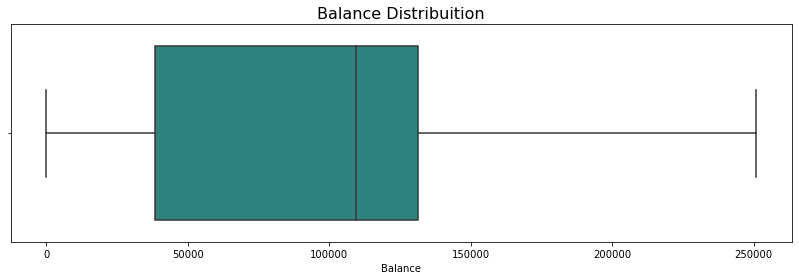

In [23]:
# Balance Distribuition

plt.figure(figsize = (14,4))
sns.boxplot(x=train_data[train_data['Exited'] == 1]['Balance'], palette='viridis')
plt.title("Balance Distribuition", fontsize=16)

plt.show()

In [24]:
train_data[train_data['Exited'] == 1]['Balance'].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

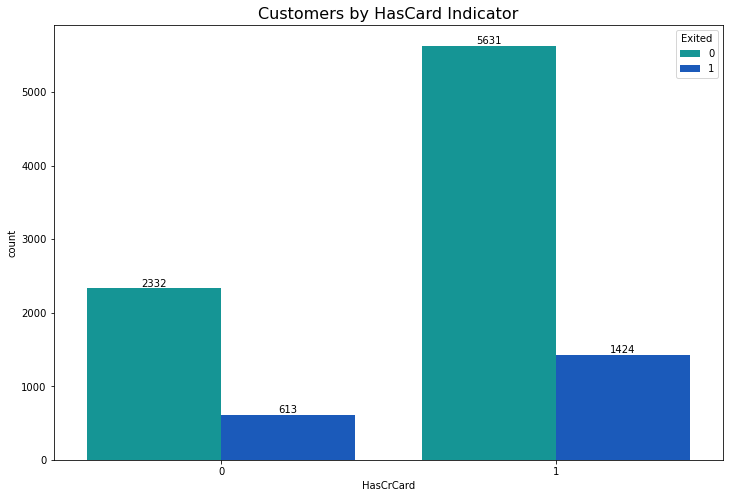

In [25]:
# By HasCard

df_card = train_data[['HasCrCard', 'Exited']]

plt.figure(figsize = (12,8))

ax = sns.countplot(data = df_card, x = 'HasCrCard', hue='Exited', palette= 'winter_r')

ax.bar_label(ax.containers[0], label_type='edge')  
ax.bar_label(ax.containers[1], label_type='edge')

plt.title("Customers by HasCard Indicator", fontsize=16)

plt.show()

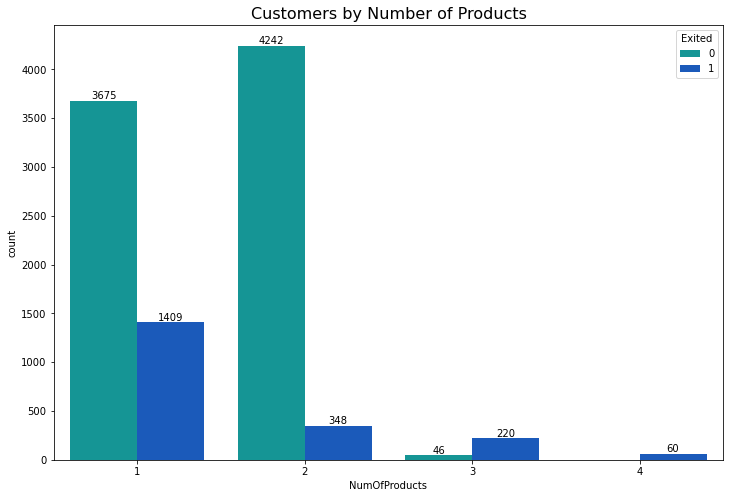

In [26]:
# By HasCard

df_prod = train_data[['NumOfProducts', 'Exited']]

plt.figure(figsize = (12,8))

ax = sns.countplot(data = df_prod, x = 'NumOfProducts', hue='Exited', palette= 'winter_r')

ax.bar_label(ax.containers[0], label_type='edge')  
ax.bar_label(ax.containers[1], label_type='edge')

plt.title("Customers by Number of Products", fontsize=16)


plt.show()

# Preparing Features and Labels

In [27]:
train_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Encoded',
       'Gender_Encoded', 'Age_Group', 'CreditScore_Groups'],
      dtype='object')

In [28]:
# Keeping only important predictors

df_train = train_data[['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Encoded',
       'Gender_Encoded']]

In [29]:
df_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Encoded,Gender_Encoded
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


# Training models

In [30]:
# Defining features and labels

X_features = df_train

y_train = train_data['Exited']

X_test = train_data.drop(columns= ['Exited','RowNumber', 
                                   'CustomerId', 'Surname', 'Geography', 'Gender',
                                   'Age_Group','CreditScore_Groups'], axis=1)

In [31]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Encoded,Gender_Encoded
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


In [32]:
# Splitting data into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_features, y_train, 
                                                  test_size=0.2,random_state=42)

In [33]:
# Training Random Forest classifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions

y_pred_rf = model_rf.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Classification Report:")
print(classification_report(y_val, y_pred_rf, target_names=label_encoder.classes_))

# Make predictions dataset test

y_pred_rf_test = model_rf.predict(X_test)

Validation Set Classification Report:
              precision    recall  f1-score   support

      Female       0.88      0.97      0.92      1607
        Male       0.79      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000




Validation Confusion Matrix:


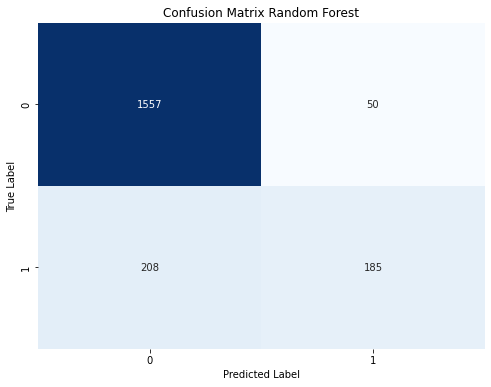

In [34]:
# Evaluate the model using the validation set

print("\nValidation Confusion Matrix:")

cmr_RF = confusion_matrix(y_val, y_pred_rf)

# Ploting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cmr_RF, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [35]:
# Training Random Forest classifier

model_lr = linear_model.LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions

y_pred_lr = model_lr.predict(X_val)

# Evaluate the model on the validation set

print("Validation Set Classification Report:")
print(classification_report(y_val, y_pred_lr, target_names=label_encoder.classes_))

# Make predictions dataset test

y_pred_lr_test = model_lr.predict(X_test)

Validation Set Classification Report:
              precision    recall  f1-score   support

      Female       0.81      0.98      0.89      1607
        Male       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000




Validation Confusion Matrix:


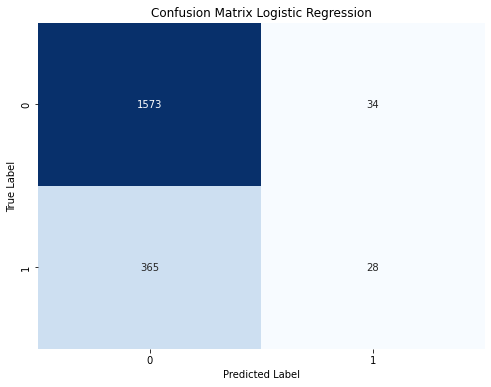

In [36]:
# Evaluate the model using the validation set

print("\nValidation Confusion Matrix:")

cmr_LR = confusion_matrix(y_val, y_pred_lr)

# Ploting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cmr_LR, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [37]:
# Training Random Forest classifier

model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

# Make predictions

y_pred_xg = model_xg.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Classification Report:")
print(classification_report(y_val, y_pred_xg, target_names=label_encoder.classes_))

# Make predictions dataset test

y_pred_xg_test = model_xg.predict(X_test)

Validation Set Classification Report:
              precision    recall  f1-score   support

      Female       0.89      0.95      0.92      1607
        Male       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000




Validation Confusion Matrix:


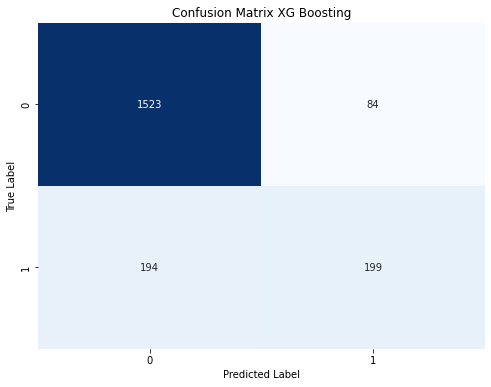

In [38]:
# Evaluate the model using the validation set

print("\nValidation Confusion Matrix:")

cmr_XG = confusion_matrix(y_val, y_pred_xg)

# Ploting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cmr_XG, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix XG Boosting")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

As we can see by validating in the Confusion Matrix, the best performance was reached by XgBoosting, predicting 199 positive exited customers